In [15]:
%reload_ext autoreload
%autoreload 2

In [16]:
from cereeberus import ReebGraph, MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg

import matplotlib.pyplot as plt
import numpy as np

import pulp #for ILP optimization

In [17]:
# import the ilp file. Note it is in the same folder as this notebook, we will move it to the correct location later

import cereeberus.distance.ilp as ilp

## Load example MapperGraphs



Text(0.5, 1.0, 'G')

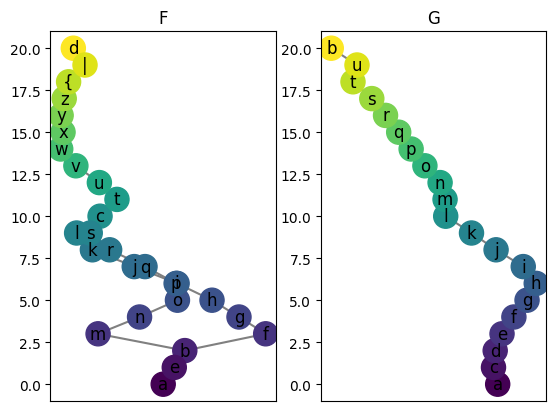

In [18]:
# F = ex_mg.interleave_example_A()
# G = ex_mg.interleave_example_B()
F = ex_mg.torus(0, 2, 10, 20, delta = 1, seed = 190)
G = ex_mg.line(0, 20)
plt.figure()
plt.subplot(121)
F.draw()
plt.title('F')
plt.subplot(122)
G.draw()
plt.title('G')

## Create the interleaving. Change the value of n for different optimizations
```python

In [32]:
myInt = Interleave(F, G, n = 2, initialize_random_maps=True, seed = 5)

# loss before optimization
print('loss before optimization: ', myInt.loss())

loss before optimization:  1.0


The optimized loss is: -0.0
Status: Optimal


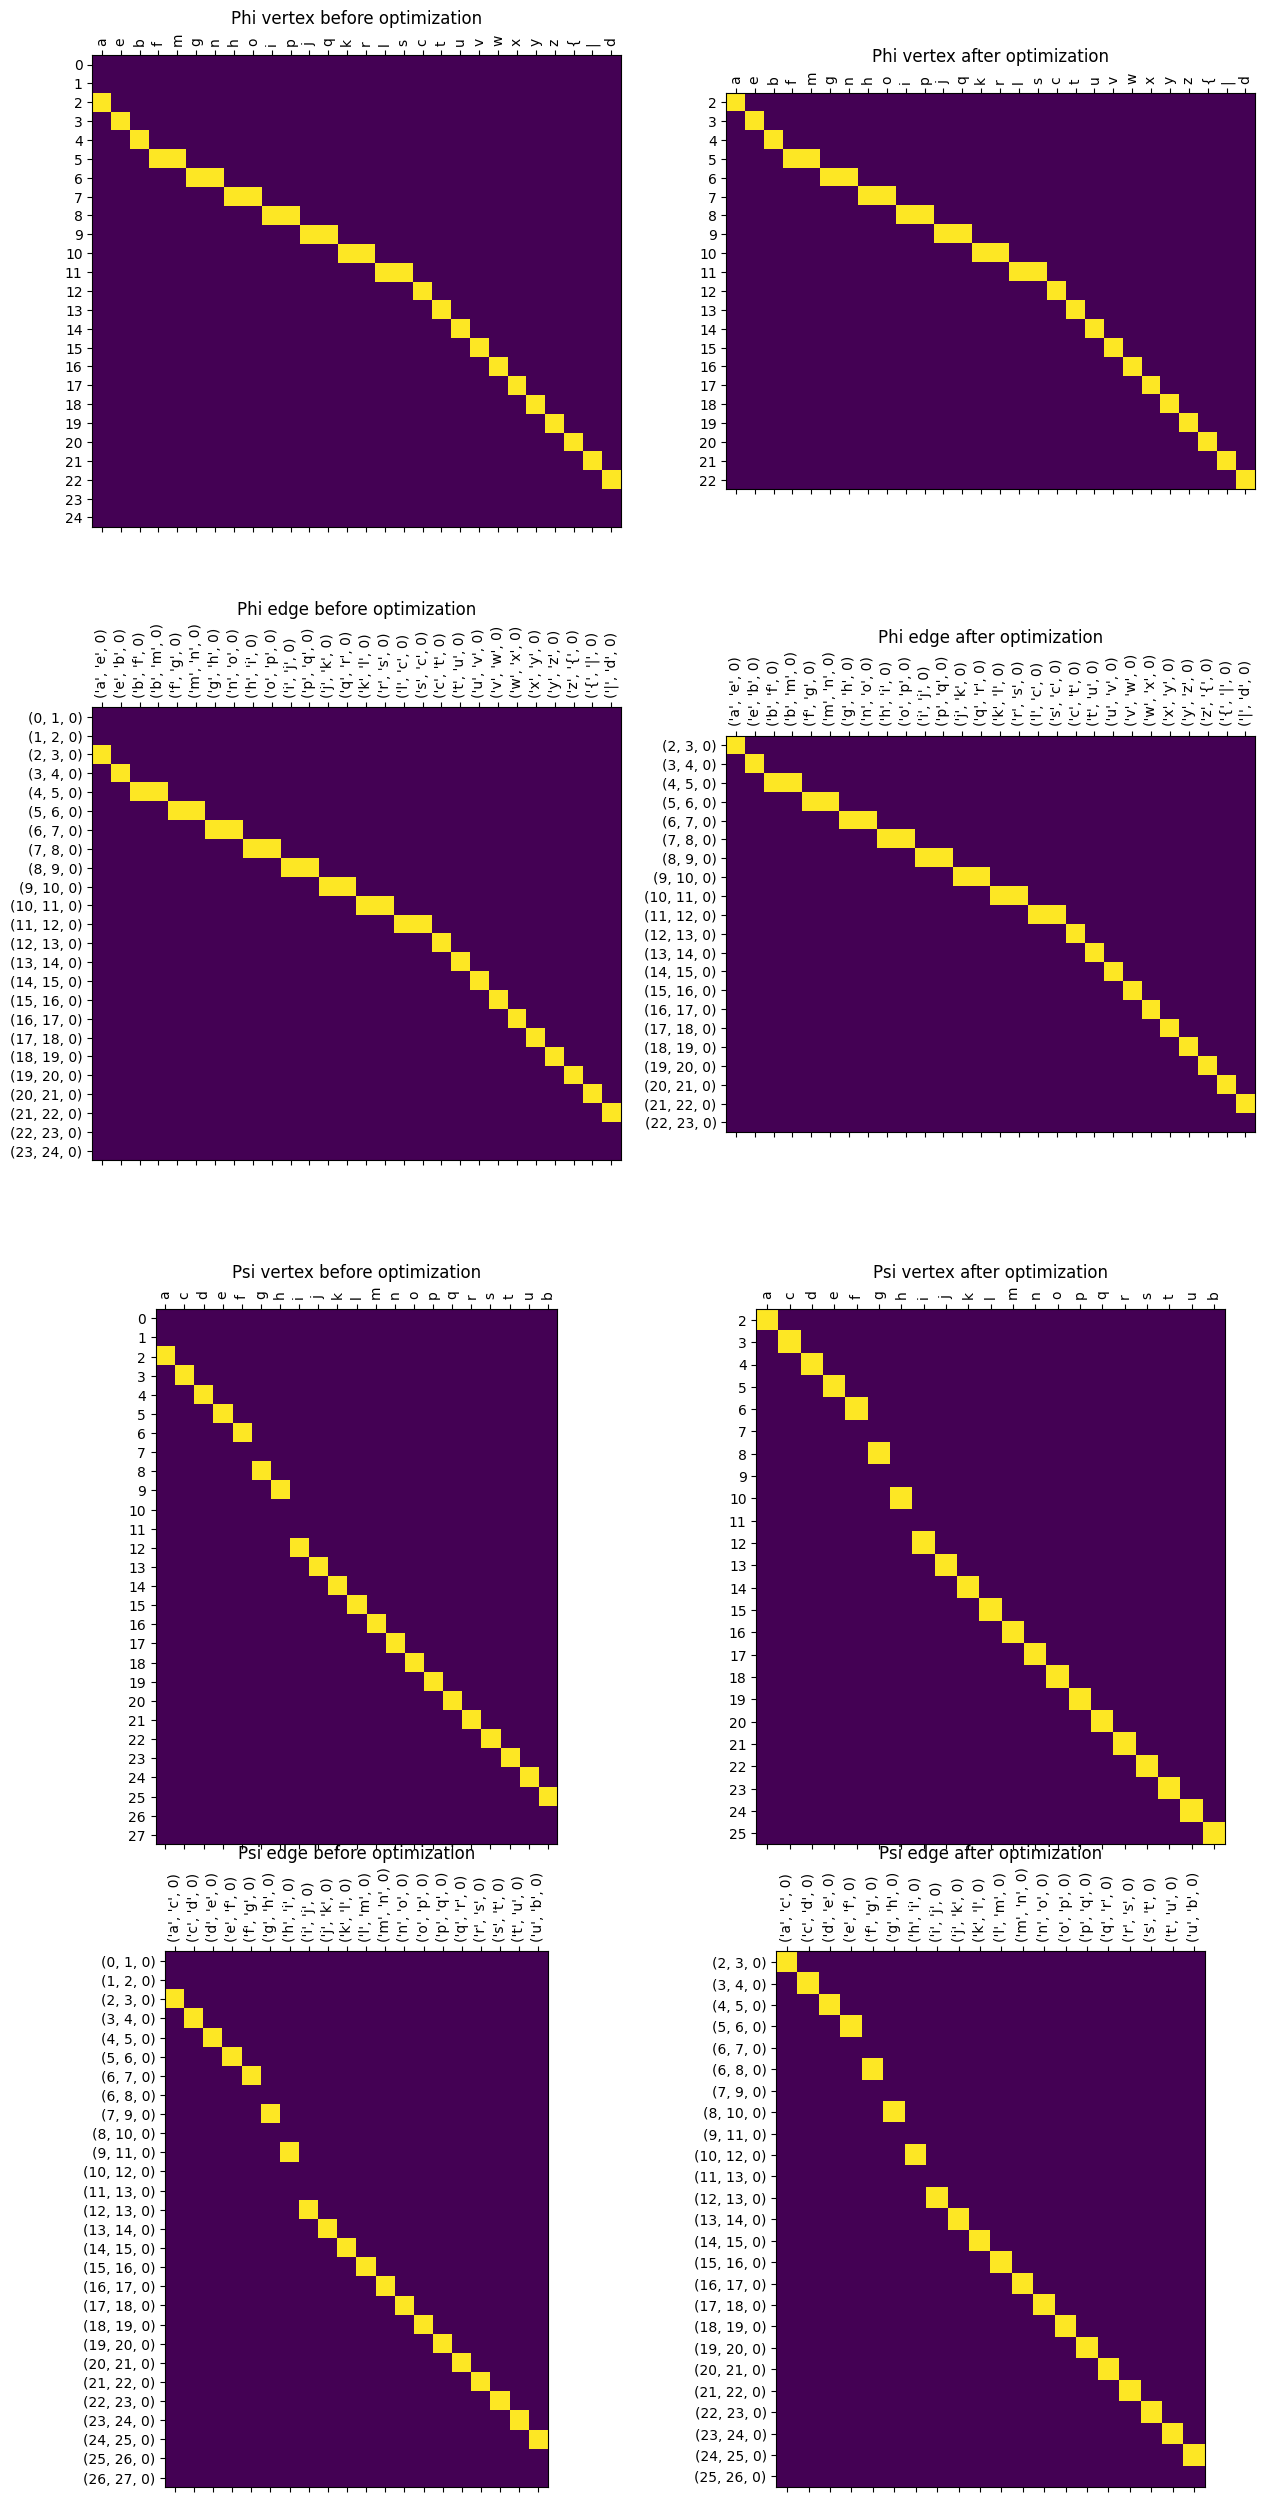

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ishikaghosh/anaconda3/envs/interleavingenv/lib/python3.13/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/5f/m89pr_zs78n8ffl7t7ndknth0000gn/T/88116d30a2c3417e89a4f2a9ea3fb906-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/5f/m89pr_zs78n8ffl7t7ndknth0000gn/T/88116d30a2c3417e89a4f2a9ea3fb906-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1548 COLUMNS
At line 4483 RHS
At line 6027 BOUNDS
At line 6425 ENDATA
Problem MODEL has 1543 rows, 397 columns and 2139 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 24 rows, 8 columns (8 integer (7 of which binary)) and 72 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I I

In [33]:
ilp.solve_ilp(myInt, verbose=True, plot = True)
loss = ilp.solve_ilp(myInt)[1]

# loss after optimization
print('loss after optimization: ', loss)